In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Load datasets
data1 = pd.read_csv("im.csv")  # Inter Milan dataset
data2 = pd.read_csv("atlanta.csv")  # Atalanta dataset

# Add a team column to distinguish players
data1['Team'] = 'Inter Milan'
data2['Team'] = 'Atalanta BC'

# Combine the datasets
data = pd.concat([data1, data2], ignore_index=True)

# Display the first few rows
print(data.head())

          Player  G  A  RC  YC  Crn  S  SOnT  BS   P  C  Tk  O  FC  FW  SAV  \
0  H. Çalhanoğlu  0  0   0   0    0  0     0   0  62  4   2  0   0   1    0   
1    D. Dumfries  2  0   0   0    1  3     2   0  29  0   1  0   1   1    0   
2  H. Mkhitaryan  0  0   0   0    1  1     0   1  55  0   1  0   2   1    0   
3     N. Barella  0  0   0   0    0  0     0   0  49  1   3  0   0   1    0   
4      M. Thuram  0  0   0   0    0  0     0   0  12  1   1  0   0   2    0   

          Team  
0  Inter Milan  
1  Inter Milan  
2  Inter Milan  
3  Inter Milan  
4  Inter Milan  


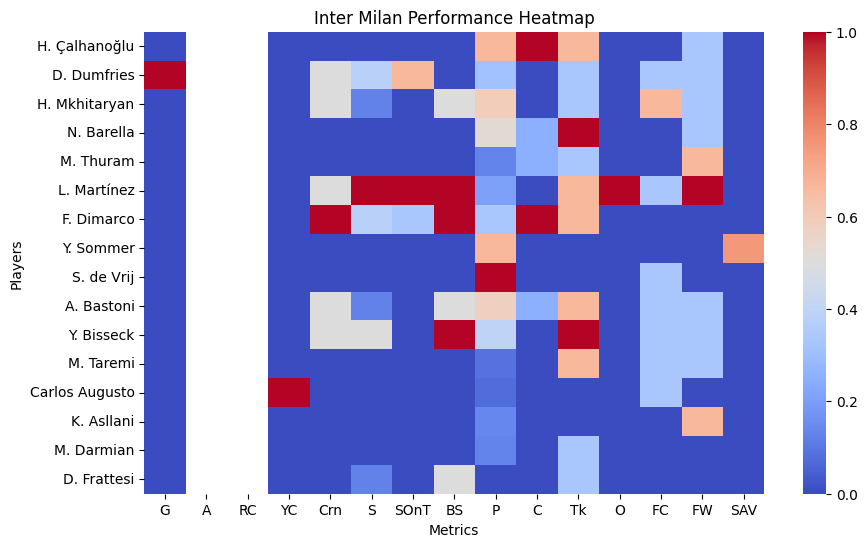

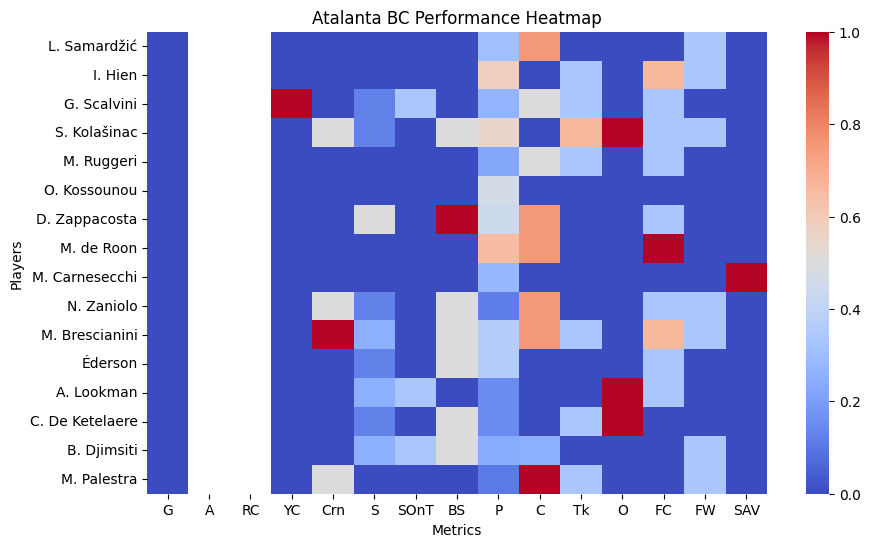

In [9]:
# Metrics to compare
metrics = ['G', 'A', 'RC', 'YC', 'Crn', 'S', 'SOnT', 'BS', 'P', 'C', 'Tk', 'O', 'FC', 'FW', 'SAV']

# Normalize metrics for better comparison
data_normalized = data.copy()
for metric in metrics:
    data_normalized[metric] = (data[metric] - data[metric].min()) / (data[metric].max() - data[metric].min())

# Create heatmaps for each team
for team in ['Inter Milan', 'Atalanta BC']:
    team_data = data_normalized[data_normalized['Team'] == team]

    # Check if team_data is empty and skip if so
    if team_data.empty:
        print(f"No data found for team: {team}. Skipping heatmap.")
        continue

    plt.figure(figsize=(10, 6))
    sns.heatmap(team_data[metrics].set_index(team_data['Player']), annot=False, cmap='coolwarm')
    plt.title(f"{team} Performance Heatmap")
    plt.xlabel("Metrics")
    plt.ylabel("Players")
    plt.show()

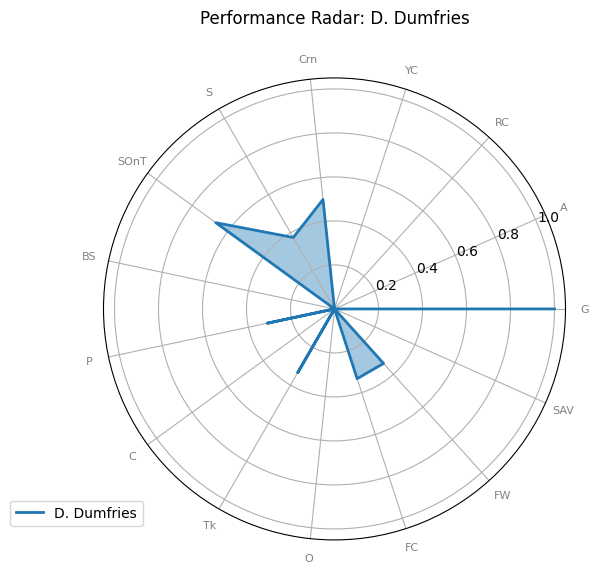

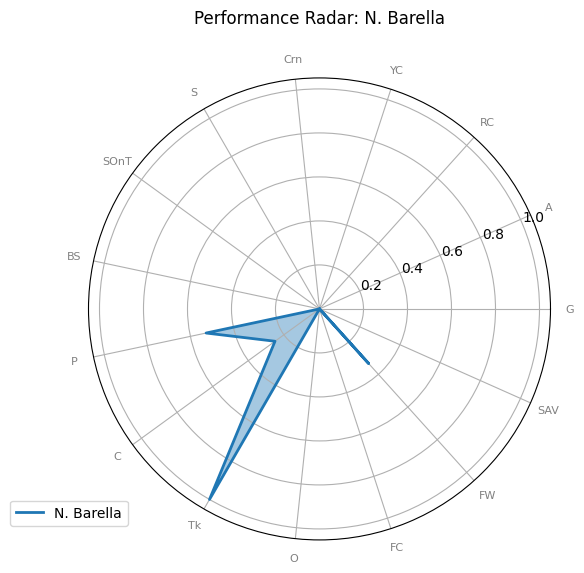

In [12]:
# Radar chart function
def radar_chart(player_name, team_data, metrics):
    player_data = team_data[team_data['Player'] == player_name]
    values = player_data[metrics].values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the chart

    # Define radar chart properties
    N = len(metrics)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Create radar chart
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], metrics, color='grey', size=8)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=player_name)
    ax.fill(angles, values, alpha=0.4)
    plt.title(f"Performance Radar: {player_name}", size=12, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

# Example: Radar chart for a specific player
radar_chart("D. Dumfries", data_normalized[data_normalized['Team'] == "Inter Milan"], metrics)
radar_chart("N. Barella", data_normalized[data_normalized['Team'] == "Inter Milan"], metrics)


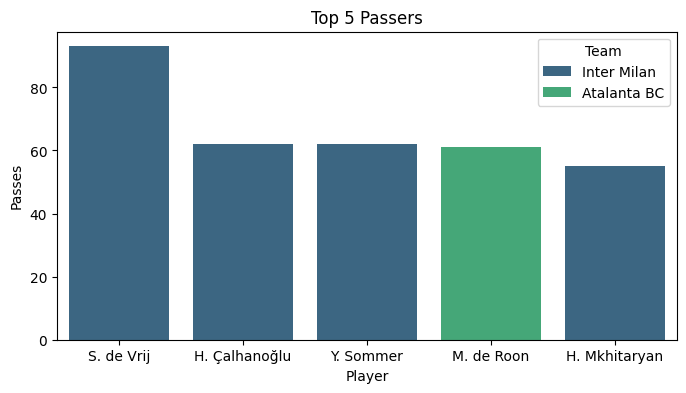

In [19]:
# Top players by Pass across teams
top_goals = data.sort_values('P', ascending=False).head(5)

plt.figure(figsize=(8, 4))
sns.barplot(x='Player', y='P', hue='Team', data=top_goals, palette='viridis')
plt.title("Top 5 Passers")
plt.xlabel("Player")
plt.ylabel("Passes")
plt.show()


<ipython-input-15-17a6b9ed3ceb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Team', y='Tk', data=data, palette='Set2')


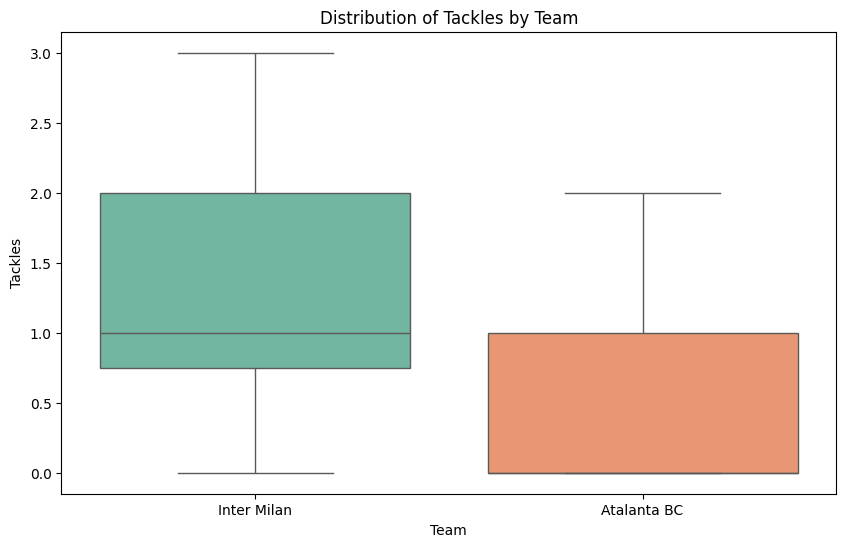

In [15]:
# Distribution of Tackles
plt.figure(figsize=(10, 6))
sns.boxplot(x='Team', y='Tk', data=data, palette='Set2')
plt.title("Distribution of Tackles by Team")
plt.xlabel("Team")
plt.ylabel("Tackles")
plt.show()
